# Week 3 - PDF Files

**Optional Reading:** Data Wrangling with Python, Chapter 5 (pages 91 - 124)
<img align="right" style="padding-right:10px;" src="figures_wk3/Data_Wrangling_Book.jpg" ><br>

**Overview:**<br>

* Avoiding using PDFs!

    1. Is the data available in another format?
    2. Converting a PDF to a usable format
    

* Working with PDFs!
    1. Extracting Text data using PyPDF2
        * Counting page numbers
        * Extracting text
        * Splitting PDFs
        * Merging PDFs        
        
    2. Extracting Tabular Data using tabula
        * Reading into a dataframe
        * Selecting a portion of a table to read
        * Reading into JSON
        * Converting to Excel and CSV files
        
    
* Use Case 1: Survey Data
    1. Python Packages
    2. Camp Analytics Survey
        * OCR Process
        * Converting PDF to JPEG
        * Extracting Text with pytesseract
        * Working with a Completed Suvey
        * Determing Respondent Inputs
        * Limitations of pytesseract
        * OCR for Hand Writing 

# Avoid using PDFs!

The opening line of chapter 5 in Data Wrangling with Python states that "Publishing data only in PDFs is criminal, but sometimes you don't have other options." (Kazil and Jamul, 2016). Trying to parse data from a PDF can be difficult and problemactic.

## Is the data available in another format?
Before resigning yourself to the fact that you "must" work with a PDF, have you tried to locate another source of the data. It is possible that the original source has is available in another format.  

For example, take a look at https://catalog.data.gov/dataset?res_format=PDF. As you scroll through the available data sets, we can see all most all of the sets are available in multiple formats.  
<img align="left" style="padding-right:10px;" src="figures_wk3/Data_Set_Formats.png" ><br>


## Converting a PDF to a usable format
Sometimes it is possible to convert a PDF into a more usable format. There are products available for purchase that will handle this conversion for you. However, they do come with a price-tag.  

Other options include, selecting an area of interest in a PDF and pasting it into a spreadsheet. From here you can save the spreadsheet into a csv file. This does not always work and can be very labor intensive depending on the size and number of PDFs you are working with. 

Finally, if you are building a process that involves receiving PDF on a periodic basis to refresh, update or enhance your original dataset, you will want to look for a programatic solution to handling your PDFs.

# Working with PDFs

The difficulty in working with PDFs stems from the fact that the data within a PDF can represent a variety of underlying data types. A single PDF can contain textual data, tabular data and visual data (graphs).  

Python3 has numerous libraries designed to help retrieve data from PDFs. Below is a representative list:

| Package | Activity Type |
| ------ | ------ |
|PyPDF2 | Reading |
|PDFTables | Reading |
|PDFMiner | Reading |
|PDFQuery | Reading |
|Slate | Reading |
|tabula-py | Reading |
|pdfrw | Reading, Creating |
|Reportlab | Creating |
|PyX | Creating |
|PyFPDF | Creating |


## Extracting text  - PyPDF2
There are number of libraries available to extract text from a PDF. One such package is PyPDF2.<br> (Yes! That name is a bit confusing because this is a library meant for Python3)

<div class="alert alert-block alert-success">
<b>Installation - PyPDF2::</b> PyPDF2 can be installed as normal using pip.
</div>

<div class="alert alert-block alert-info">
<b>Helpful Hint::</b> You can execute os commands from within your notebook by starting the command with '!'.  For example, to list out al the files in a directory,<br>
* On a PC:  type '!dir'
* On a MAC: type '!ls'

The following line will install PyPDF2 from within the notebook. In week 2, we saw how to include a try/except block. If you were going to share your notebook with someone else and didn't know if they already had this package installed, you might consider wrapping the pip install command in a try/except.
</div>

In [1]:
!pip install PyPDF2

Looks like I already had PyPDF2 installed. In week 2, we saw how to include a try/except block. If you were going to share your notebook with someone else and didn't know if they already had this package installed, you might consider wrapping the pip install command in a try/except.

PyPDF2 has a lot of functionality within the package. I will not detail all of this within this FTE, however, do take a look at https://pythonhosted.org/PyPDF2/ for more details.

For now, we will import the library and work with a PDF version of sonnets by William Shakespeare.

<div class="alert alert-block alert-info">
<b>Helpful Hint::</b> Notice the open() command in the following cell. Aside from the filename, we are passing in two paramaters ('r' and 'b'). The 'r' signifies that we want to open the specified file for reading and the 'b' menas that we want to open the file in binary mode. <br>
PyPDF2 operates in binary mode, so you need to pass the 'b' parameter whenever you are interacting with a file. <br>
Take a look at https://www.programiz.com/python-programming/file-operation for more information on open() and the parameter available for you to use.
</div>

In [2]:
#import PyPDF2 
from PyPDF2 import PdfFileReader, PdfFileWriter,PdfFileMerger

# create a file object for our PDF
pdfFileObj = open('data_wk3/william_shakespeare_2012_1.pdf', 'rb') 


# create an object to access the PDF
pdfReader = PdfFileReader(pdfFileObj) 

### Page Numbers
PyPDF2 can count the number of pages in your PDF

In [3]:
print(pdfReader.numPages) 

471


### Reading a single page
You can get a specific page from your PDF.  Let's take a look at the text on page 5.

In [4]:
# creating a page object - pdfReader starts at index 0
pageObj = pdfReader.getPage(4) 

# store the text into a string
page_string = pageObj.extractText()

# display the text on the selected page
page_string

' Some of Shakespeare\'s plays were published in quarto editions from 1594. By1598, his name had become a selling point and began to appear on the titlepages. Shakespeare continued to act in his own and other plays after his successas a playwright. The 1616 edition of Ben Jonson\'s Works names him on the castlists for Every Man in His Humour (1598) and Sejanus His Fall (1603). Theabsence of his name from the 1605 cast list for Jonson™s Volpone is taken bysome scholars as a sign that his acting career was nearing its end. The First Folioof 1623, however, lists Shakespeare as one of "the Principal Actors in all thesePlays", some of which were first staged after Volpone, although we cannot knowfor certain which roles he played. In 1610, John Davies of Hereford wrote that"good Will" played "kingly" roles. In 1709, Rowe passed down a tradition thatShakespeare played the ghost of Hamlet\'s father. Later traditions maintain thathe also played Adam in As You Like It and the Chorus in Henry V, 

### Splitting  a PDF
Let's split out page 5 and write it out as a new PDF file

In [5]:
# create an object to write to a PDF
pdfWriter = PdfFileWriter()

# reusing pageObj from above
pdfWriter.addPage(pageObj)

# create a new PDF 
with open('data_wk3/single_page.pdf', 'wb') as out:
    pdfWriter.write(out)

Let's go look at the newly created PDF

In [6]:
# same steps as above
s_pdfFileObj = open('data_wk3/single_page.pdf', 'rb') 

s_pdfReader = PdfFileReader(s_pdfFileObj) 

s_pageObj = s_pdfReader.getPage(0) 

# you don't have to store the text to a string first
print(s_pageObj.extractText())


 Some of Shakespeare's plays were published in quarto editions from 1594. By1598, his name had become a selling point and began to appear on the titlepages. Shakespeare continued to act in his own and other plays after his successas a playwright. The 1616 edition of Ben Jonson's Works names him on the castlists for Every Man in His Humour (1598) and Sejanus His Fall (1603). Theabsence of his name from the 1605 cast list for Jonson™s Volpone is taken bysome scholars as a sign that his acting career was nearing its end. The First Folioof 1623, however, lists Shakespeare as one of "the Principal Actors in all thesePlays", some of which were first staged after Volpone, although we cannot knowfor certain which roles he played. In 1610, John Davies of Hereford wrote that"good Will" played "kingly" roles. In 1709, Rowe passed down a tradition thatShakespeare played the ghost of Hamlet's father. Later traditions maintain thathe also played Adam in As You Like It and the Chorus in Henry V, thou

Our code block for splitting a single page out of an existing PDF could be useful going forward/ . Let's turn into a function.

In [7]:
def make_pdf_of_single_page(page_num):
    # same as above
    pdfWriter = PdfFileWriter()
    pdfWriter.addPage(pdfReader.getPage(page_num - 1))

    # construct a unique filename
    out_filename = 'data_wk3/page_' + str(page_num) + '.pdf'
    
    # create a new PDF 
    with open(out_filename, 'wb') as out:
        pdfWriter.write(out)

Now, let's use our new function and make single page pdfs for pages 10-15 of the original pdf. Then verify that all of the new pdfs exist and contain 1 page

In [8]:
# remember range(i,n) generates an iterator to progress integers starting with i upto n-1
# https://www.tutorialspoint.com/python3/python_for_loop.htm
for num in range(10,16):
    make_pdf_of_single_page(num)

In [9]:
# verify that the pdfs where created
!ls data_wk3/page*

data_wk3/page_10.pdf data_wk3/page_12.pdf data_wk3/page_14.pdf
data_wk3/page_11.pdf data_wk3/page_13.pdf data_wk3/page_15.pdf


<div class="alert alert-block alert-info">
<b>Helpful Hint::</b> The glob package is really useful when you are looking a specific path within your filestructure. The cell below asks for all the files that match the pattern 'data/page*'. <br>
https://docs.python.org/2/library/glob.html
</div>

In [10]:
# let's create a list of all the pdfs we just created
import glob

pdf_list = [f for f in glob.glob('data_wk3/page*')]

In [11]:
pdf_list

['data_wk3/page_12.pdf',
 'data_wk3/page_13.pdf',
 'data_wk3/page_11.pdf',
 'data_wk3/page_10.pdf',
 'data_wk3/page_14.pdf',
 'data_wk3/page_15.pdf']

In [12]:
# verify they all contain a single page
for pdf in pdf_list:
    n_pdfFileObj = open(pdf, 'rb') 
    n_pdfReader = PdfFileReader(n_pdfFileObj) 
    print(pdf,'has', n_pdfReader.numPages, 'page(s)') 
    
    # close the fileobjects
    n_pdfFileObj.close()

data_wk3/page_12.pdf has 1 page(s)
data_wk3/page_13.pdf has 1 page(s)
data_wk3/page_11.pdf has 1 page(s)
data_wk3/page_10.pdf has 1 page(s)
data_wk3/page_14.pdf has 1 page(s)
data_wk3/page_15.pdf has 1 page(s)


Looks like each of the single page PDFs were successfully created.

### Merging PDFs 
Let's merge the 6 individual single page pdfs we just split out into another PDF.  We should see a 6 page PDF at the end of this section.

In [13]:
# creating pdf file merger object 
pdfMerger = PdfFileMerger() 

# appending the individual pdfs to the merger object
for pdf in pdf_list:
    pdfMerger.append(PdfFileReader(pdf),'rb')    
        
# writing combined pdf to output pdf file 
with open('data_wk3/merged.pdf', 'wb') as new_file: 
    pdfMerger.write(new_file)    

Let's verify that the merged.pdf has 6 pages

In [14]:
m_pdfFileObj = open('data_wk3/merged.pdf', 'rb') 
m_pdfReader = PdfFileReader(m_pdfFileObj) 
print(m_pdfReader.numPages)

6


Let just spot check this a bit more and compare the text from page_14.pdf and page 4 of merged.pdf.  They should match.

In [15]:
# looking at page_14.pdf
v_pdfFileObj = open('data_wk3/page_14.pdf', 'rb') 
v_pdfReader = PdfFileReader(v_pdfFileObj) 
v_pageObj = v_pdfReader.getPage(0) 

# look at the first 100 characters
print(v_pageObj.extractText()[:100])

In 1598, the cleric and author Francis Meres singled him out from a group ofEnglish writers as "the 


In [16]:
# looking at merged.pdf
m_pageObj = m_pdfReader.getPage(4) 

# only need the first 100 characters for comparison
print(m_pageObj.extractText()[:100])

In 1598, the cleric and author Francis Meres singled him out from a group ofEnglish writers as "the 


We have a match!

<div class="alert alert-block alert-danger">
<b>Important::</b> Remember to close the pdf objects once you are finished.  Bad things happen if you don't!
</div>

In [17]:
# closing any of the remaining pdf file objects
pdfFileObj.close() 
s_pdfFileObj.close()
m_pdfFileObj.close()
v_pdfFileObj.close()

## Extracting tabular data - tabula
Not all data within a PDF is text. Many PDFs contain tables with various information.  If you stop and think about it, a table is simpily a visual represenatation of a dataframe. Most, if not all, python packages read tabular data into a dataframe. Whether you want to or not! So, this is a concept that will be hard to demonstrate without using a dataframe structure. Even though dataframes are not the main focus of this class, we should still review what it takes to extract tabular data.

For this we are going to use the python package tabula. 


<div class="alert alert-block alert-success">
<b>Installation - Tabula::</b> To install the tabula package, you can use pip as shown before. https://pypi.org/project/tabula-py/
</div>

<div class="alert alert-block alert-success">
<b>Installation - Java::</b> Note: in order to use tabula, you need to have the latest version of java installed. https://aegis4048.github.io/parse-pdf-files-while-retaining-structure-with-tabula-py has some useful information if you need help getting java installed on your machine.
</div>

In [18]:
!pip install tabula-py

### Reading a table into a dataframe

In [19]:
# import tabula library
import tabula

# pdf location
pdf_file = "data_wk3/offense.pdf"

# read our pdf into a pandas dataframe
df_offense = tabula.read_pdf(pdf_file)

In [20]:
df_offense.head(10)

,1,Abuse and Other Offensive,"1-1639 CR, §3-",Unnamed: 3,Felony,Unnamed: 5,Person,II,Unnamed: 8
0,NaN,Conduct,601(b)(2)(ii),NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"Child Abuse—physical, with death",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Abuse and Other Offensive,"1-0334 CR, §3-",NaN,Felony,NaN,Person,II,NaN
3,NaN,Conduct,601(b)(2)(i),NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,"Child Abuse—physical, 1st degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2-1,Abuse and Other Offensive,"1-0173 CR, §3-601(d)",NaN,Felony,15Y,Person,IV,NaN
6,NaN,Conduct,1-3802,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,"Child Abuse—physical, 2nd degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3,Abuse and Other Offensive,"1-0322 CR, §3-602(b)",NaN,Felony,NaN,Person,II,NaN
9,NaN,Conduct,1-0922,NaN,NaN,NaN,NaN,NaN,NaN


Like I said, reading tables into a dataframe object is really easy.


### Reading only a portion of a table
Tabula does have some other nice features. With tabula it is possible to read only a portion of a table by using the area option. To do this, we pass the coordinates of the area we wish to extract. <br>
Format: area(y1, x1, y2, x2)

In [21]:
tabula.read_pdf(pdf_file, area=(100,100,300,300))

,Unnamed: 0,Unnamed: 1,601(b)(2)(ii)
0,"se—physical, with death",NaN,NaN
1,Other Offensive,1-0334,"CR, §3-"
2,NaN,NaN,601(b)(2)(i)
3,"se—physical, 1st degree",NaN,NaN
4,Other Offensive,1-0173,"CR, §3-601("
5,NaN,1-3802,NaN
6,"se—physical, 2nd degree",NaN,NaN
7,Other Offensive,1-0322,"CR, §3-602("
8,NaN,1-0922,NaN
9,se—sexual,NaN,NaN


Notice how the information in the first and last columns are "cutoff".  When we use the area format, tabula will only consider data that fully fits within the specified coordinates.

### Reading a table into JSON
Tabula can read a table directly into a JSON object.

In [22]:
tabula.read_pdf(pdf_file, output_format="json")

[{'extraction_method': 'stream',
  'top': 85.0,
  'left': 20.0,
  'width': 577.0,
  'height': 609.0,
  'right': 597.0,
  'bottom': 694.0,
  'data': [[{'top': 91.81,
     'left': 23.88,
     'width': 7.530000686645508,
     'height': 5.510000228881836,
     'text': '1'},
    {'top': 92.05,
     'left': 59.88,
     'width': 118.8699951171875,
     'height': 5.510000228881836,
     'text': 'Abuse and Other Offensive'},
    {'top': 91.81,
     'left': 214.44,
     'width': 67.32501220703125,
     'height': 5.510000228881836,
     'text': '1-1639 CR, §3-'},
    {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''},
    {'top': 91.81,
     'left': 331.68,
     'width': 30.32999610900879,
     'height': 5.510000228881836,
     'text': 'Felony'},
    {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''},
    {'top': 91.81,
     'left': 460.2,
     'width': 29.729990005493164,
     'height': 5.510000228881836,
     'text': 'Person'},
    {'top': 91.81,
     'left': 515

### Export into Excel or CSV
We can easily convert a table within a PDF to Excel or CSV with tabula.

In [23]:
# converting to Excel
tabula.convert_into(pdf_file, "data_wk3/offense.xlsx", output_format="xlsx")

# converting to csv
tabula.convert_into(pdf_file, "data_wk3/offense.csv", output_format="csv")

In [24]:
# verify that the Excel and csv files were created
! ls data_wk3/offense*

data_wk3/offense.csv  data_wk3/offense.pdf  data_wk3/offense.xlsx


Review Time:
Thus far we have been able to read text and tabular data from a PDF, along with splitting/merging and writing a PDF.  We have also explored how to read tabular data directly into a dataframe, JSON, Excel and CSV data structures. <br>

The only drawback with what we have done upto this point is that all of our PDFs have only contained a single data format.  This is not very realistic, since most PDFs contain a variety of data formats within a single document.

# Use Case 1: Survey Data
Have you ever been to a class, seminar or event where you are presented with a paper survey? <br>
Ever wonder what happens to those paper surveys once filled out? <br>

One option is to manually transfer the data from the paper copies into Excel.  This is a very expensive endeavour and can have a high error rate. Once all the user data has been transferred the surveys are either boxed up and warehoused.  Some organizations go the extra step to scan all the paper surveys into PDFs. This option is only slightly better than storing the original documents in a warehouse.  Yes, there is a digit copy of all the survey data, but to what end?

The problem with the above scenario is that the organization that wanted the survey data (I assuming that they wanted it because they went through the effort to create and collect surveys) doesn't have their data in an accurate and useable format.

Let's see if we can solve this problem? (Spoiler alert!  We can!)

## Multiple Data Formats
Most surveys have a wide variety of data formats there are used to gather a respondents reactions and opinions about something.Everything has free formed text to circling numeric ratings to check boxes can be found in a survey.

<img align="center" style="padding-right:10px;" src="figures_wk3/checkboxes.png" >

### Python Packages necessary to support OCR
<div class="alert alert-block alert-success">
<b>Installation - Packages to support OCR::</b> Before we get too far ahead of ourselves, there are a number of python packages that we need to install. I have included some helpful links that review the installation process for both Windows and Mac OS. <br>
* ghostScript (https://wiki.scribus.net/canvas/Installation_and_Configuration_of_Ghostscript)<br>
* imagemagick (http://docs.wand-py.org/en/0.4.1/guide/install.html) <br>
* wand (http://docs.wand-py.org/en/0.4.1/guide/install.html) <br>
* Pillow (https://wp.stolaf.edu/it/installing-pil-pillow-cimage-on-windows-and-mac/) <br>
* tesseract (https://github.com/tesseract-ocr/tesseract/wiki) <br>
* pytessseract (https://pypi.org/project/pytesseract/) <br>

Some of these packages can take a bit to install, but your patience will be rewarded!
</div>


### Camp Analytics Survey
"I want to thank you all for spending the past week with us hear at Camp Analytics! As you walked in this morning, you were given a survey and pencil.  Please take a moment to fill out your survey.  This information will help us imporve for the next camp session. Once you are finished, take your completed survey to the checkout table and finalize your payment options with our staff. Safe travels home"

Camp Analytics Survey
<img align="center" style="padding-right:10px;" src="figures_wk3/survey_overview.png" >

#### The OCR Process
##### Two weeks later
The Director of Camp Analytics comes to you with box after box filled with completed Camp Analytics surveys.  Your task is to figure out how to get all of the respondent data off the surveys and into a "useable" format.

After a bit of research, here is the process that you determine will allow you to complete your task at hand, with a high degree of accuracy.

<img align="center" style="padding-right:10px;" src="figures_wk3/process.png" >

To develop and test your process, you work with a blank copy of the survey to start with. You scan the blank survey into a PDF. 

#### Convert: PDF to JPEG
Your research has determined that the first step is to convert the PDF into a JPEG image.

<div class="alert alert-block alert-warning">
<b>MagicReadImage Error:</b> If you receive an error that reads something like: <br>
    <i>"MagickReadImage returns false, but did not raise ImageMagick exception. This can occurs when a delegate is missing, or returns EXIT_SUCCESS without generating a raster."</i><br>
your issue is with ghostScript. Try rebooting first and then reinstall ghostScript and then reboot.
</div>

In [25]:
# import stuff
from wand.image import Image as Img

# variables are so much eaiser to work with
infile = 'CampAnalytics_blank.pdf'
outfile = 'camp_analytics_blank.jpg'

base_dir = 'images_wk3/' 

blank_infile = base_dir + infile    
blank_outfile = base_dir + outfile 

# actually convert the PDF into a JPEG
with Img(filename = blank_infile, resolution=300) as img:
    img.compression_quality = 99
    img.save(filename = blank_outfile)

Let's verify that a jpeg was created.

In [26]:
!ls images_wk3/camp_analytics*


images_wk3/camp_analytics_blank-0.jpg images_wk3/camp_analytics_blank-1.jpg


Hmmm....  Why are there two JPEG files? Time to take a look at both of them.

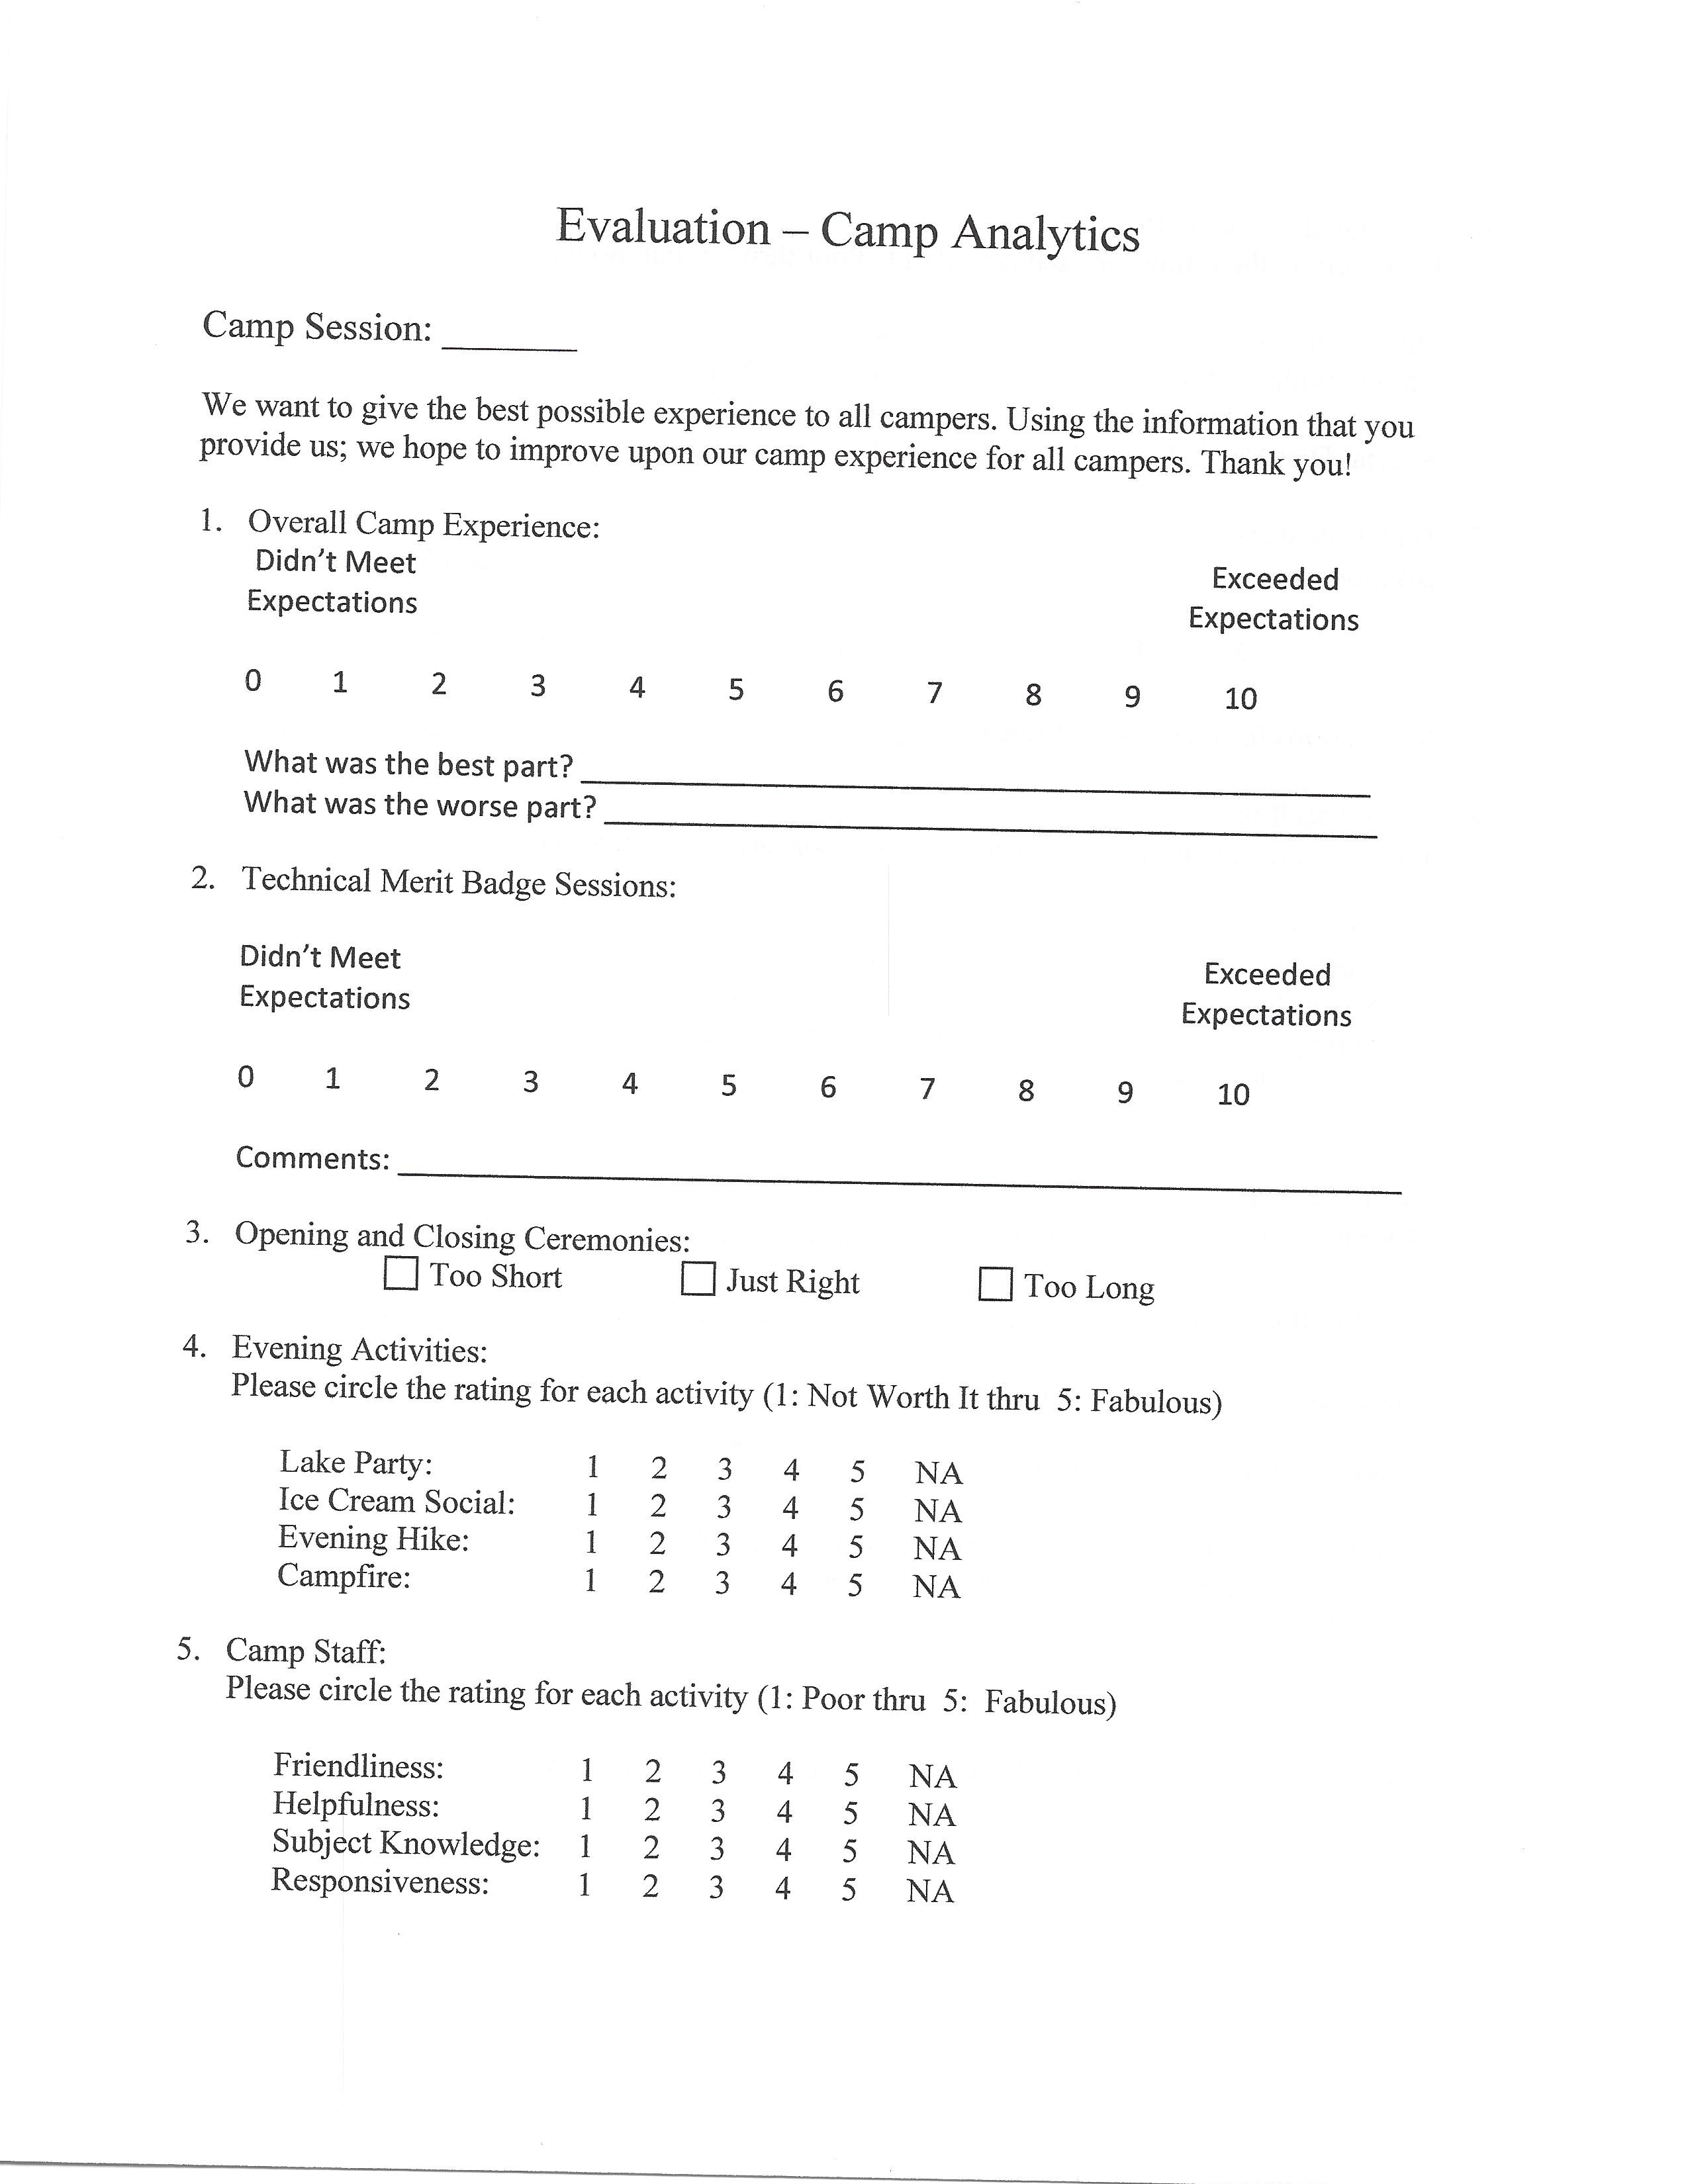

In [27]:
# look at the file with the 0 postfix first
from IPython.display import Image

blank_image1 = base_dir + 'camp_analytics_blank-0.jpg'

Image(filename=blank_image1)

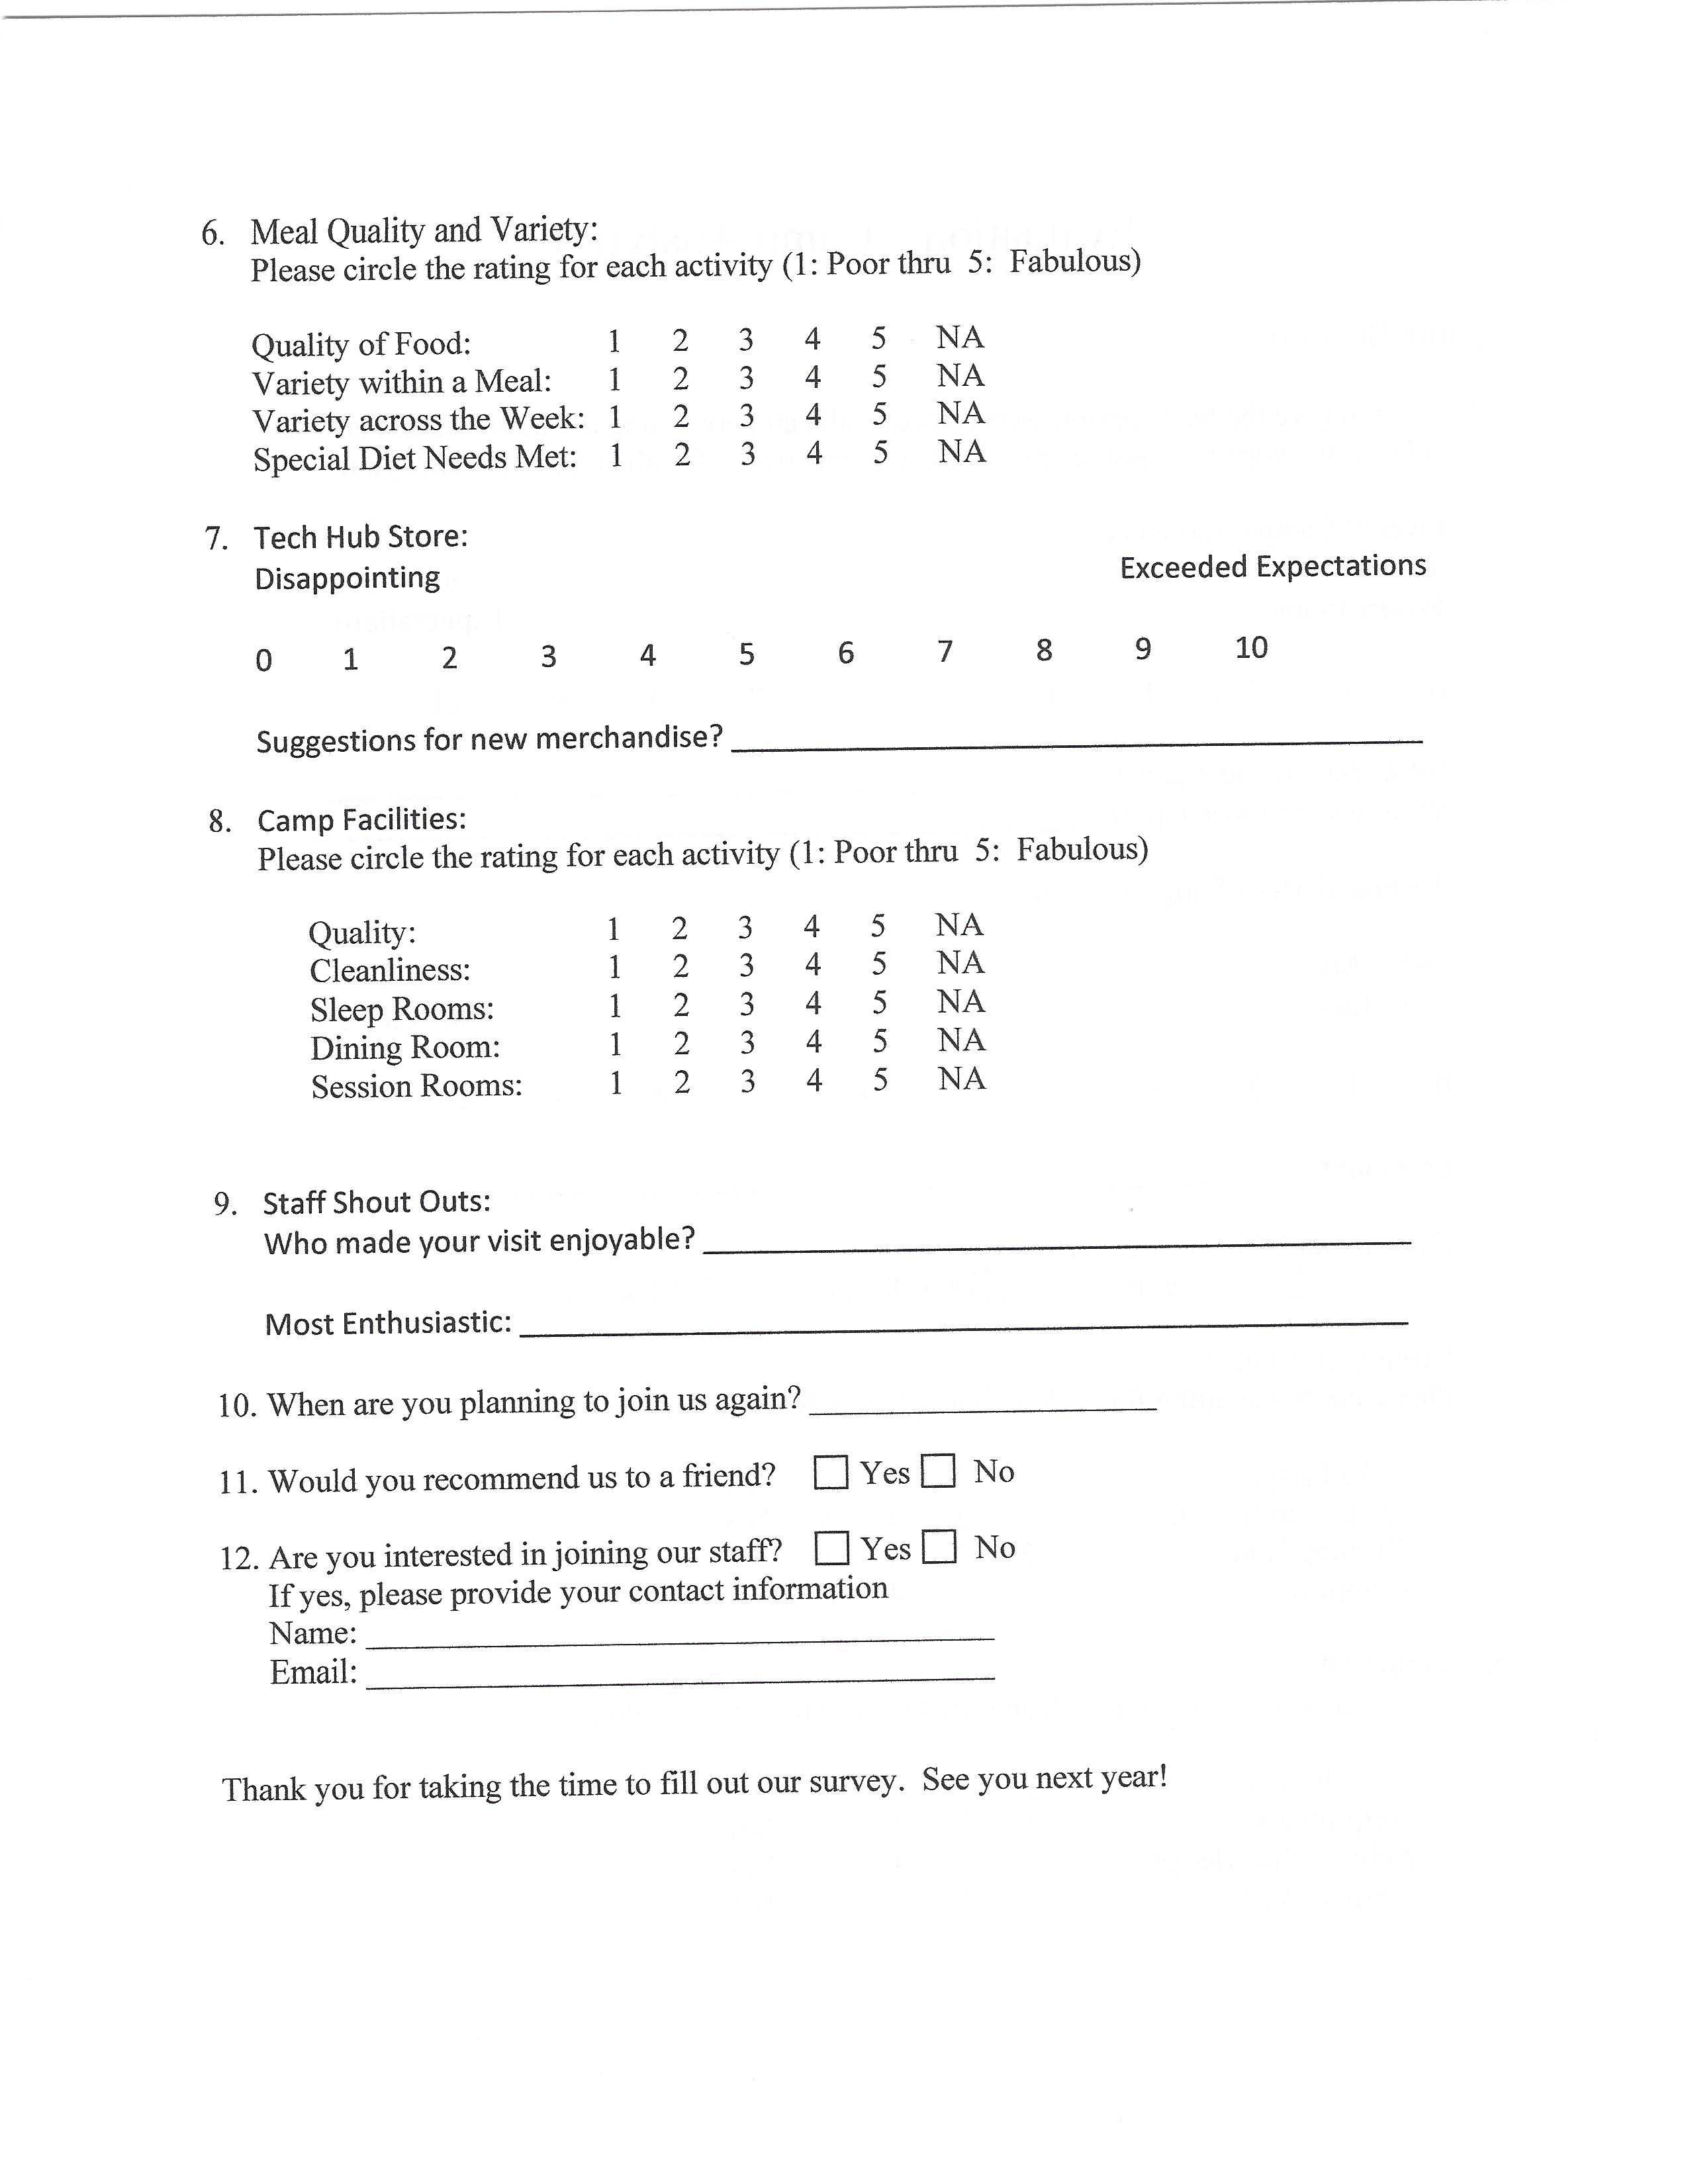

In [28]:
# and now for the second file
from IPython.display import Image

blank_image2 = base_dir + 'camp_analytics_blank-1.jpg'

Image(filename=blank_image2)

Looks like we get a separate JPEG image for each page in the PDF.  Good to know!
#### Extracting Text with pytesseract
Time to see if we can read the text off the blank survey.  We will use Python's pytesseract package, which we already installed, (https://pypi.org/project/pytesseract/) to read the text out of the JPEG image. 

In [29]:
# more imports
from PIL import Image
import pytesseract

# read and store the image
blank_text = pytesseract.image_to_string(Image.open(blank_image1))

# let's see what we have
blank_text

'Evaluation — Camp Analytics\n\nCamp Session:\n\nWe want to give the best possible experience to all campers. Using the information that you\nprovide us; we hope to improve upon our camp experience for all campers. Thank you!\n\nL.\n\nOverall Camp Experience:\nDidn’t Meet Exceeded\nExpectations Expectations\n\n0 1 2 3 4 5 6 7 8 9 10\n\nWhat was the best part?\neee\nWhat was the worse part?\neee\n\nTechnical Merit Badge Sessions:\n\nDidn’t Meet Exceeded\nExpectations Expectations\n\n0 1 2 3 4 5 6 7 8 9 10\n\nComments:\neee\n\nOpening and Closing Ceremonies:\n[_] Too Short [-] Just Right [] Too Long\n\nEvening Activities:\nPlease circle the rating for each activity (1: Not Worth It thru 5: F abulous)\n\nLake Party: 1 2 3 4 5 NA\nIce Cream Social: 1 2 3 4 5 NA\nEvening Hike: 1 2 3 4 5 NA\nCampfire: 1 2 3 4 5 NA\n\nCamp Staff:\n\nPlease circle the rating for each activity (1: Poor thru 5: Fabulous)\nFriendliness: I 2 3 4 5 NA\nHelpfulness: 1 2 3 4 5 NA\nSubject Knowledge: 1 2 3 4 #5 NA\nRe

Awesome news!  It looks like pytesseract was able to "read" all of the text off the first page! Based on the data that was returned, it seems like pytesseract reads the survey from left to right and top to bottom just like a human would.

Needs a little bit of parsing and organizing, but it appears to all be here. 

#### Working with a Completed Survey

Time to see what pytesseract can do with a completed survey. You repeat all the steps up to this point with a completed survey rather than the blank survey. 

In [30]:

# import stuff
from wand.image import Image as Img

infile2 = 'CampAnalytics_completed.pdf'
outfile2 = 'camp_analytics_completed.jpg'

filled_infile = base_dir + infile2
filled_outfile = base_dir + outfile2


with Img(filename=filled_infile, resolution=300) as img:
    img.compression_quality = 99
    img.save(filename=filled_outfile)

In [31]:
# verify jpg images were created
!ls images/camp_analytics*

ls: images/camp_analytics*: No such file or directory


We got two images again (Love it when things are consistent!)

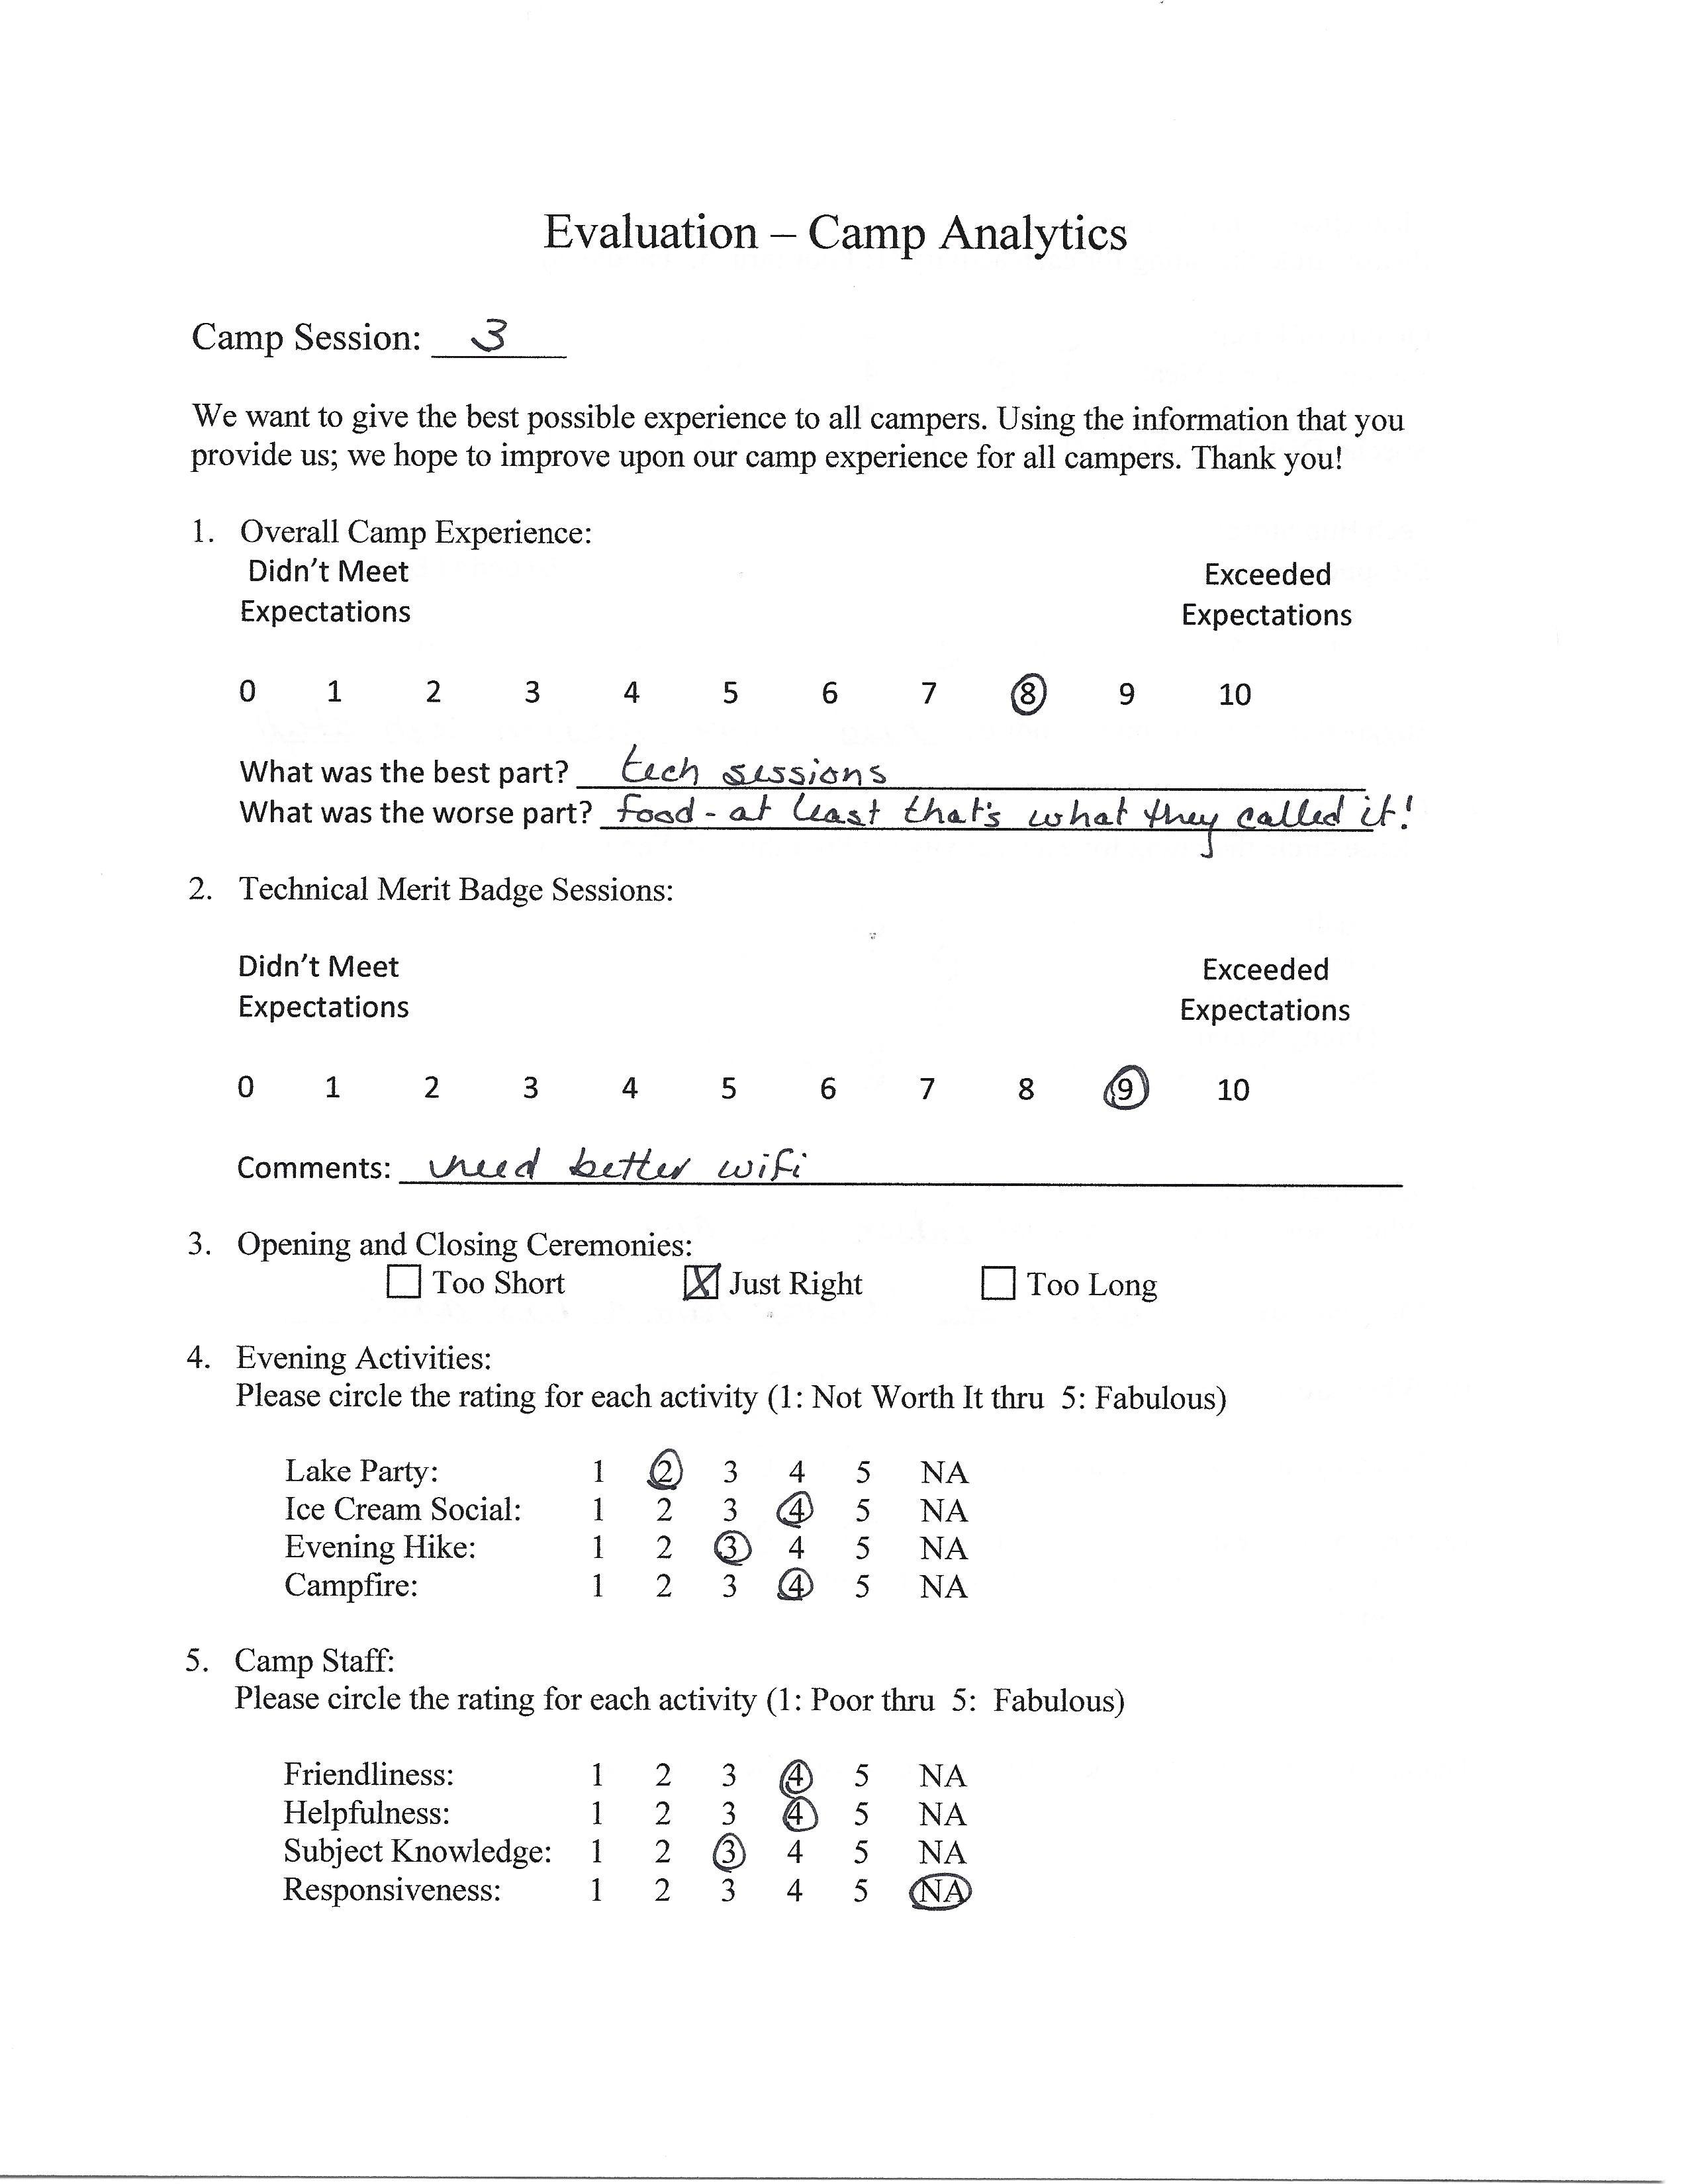

In [32]:
# looking at page1 of the completed survey
from IPython.display import Image

filled_image1 = base_dir + 'camp_analytics_completed-0.jpg'

Image(filename = filled_image1)

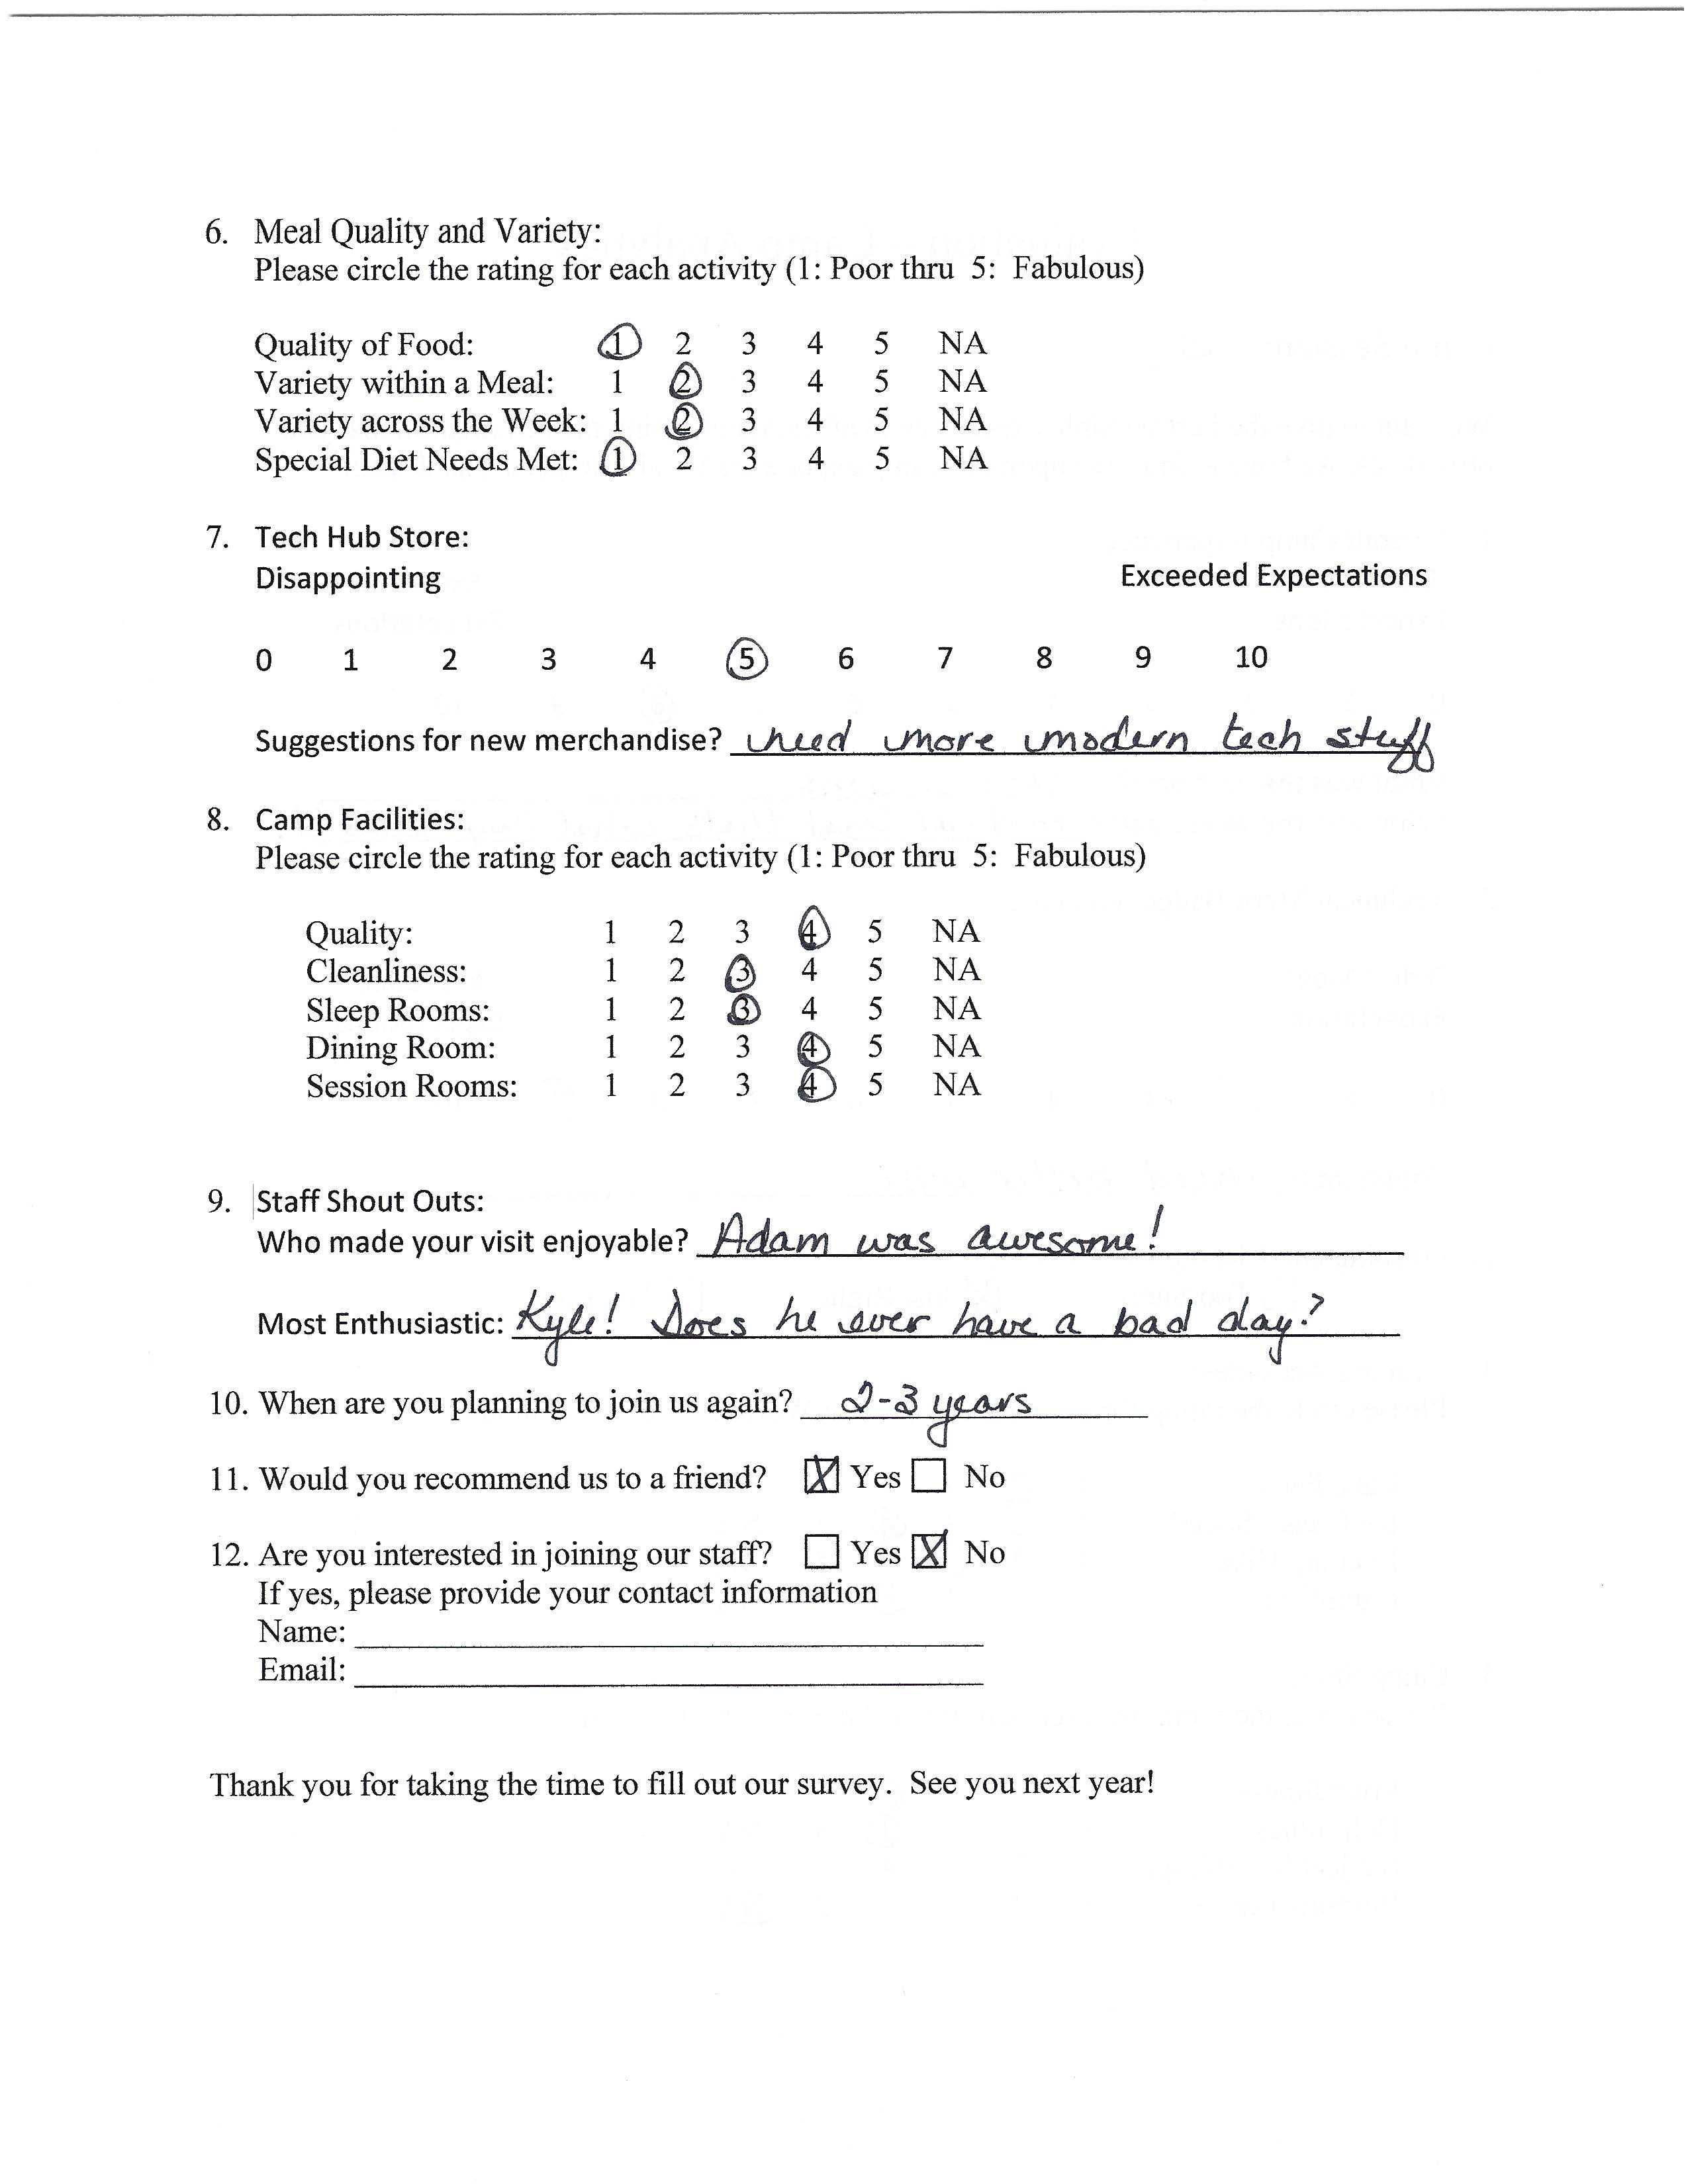

In [33]:
# and page two of the completed survey
from IPython.display import Image

filled_image2 = base_dir + 'camp_analytics_completed-1.jpg'

Image(filename = filled_image2)

In [34]:
# more imports
from PIL import Image
import pytesseract

# read and store the image
filled_text = pytesseract.image_to_string(Image.open(filled_image1))

# let's see what we have
filled_text

'Evaluation — Camp Analytics\n\nCamp Session: 3\n\nWe want to give the best possible experience to all campers. Using the information that you\nprovide us; we hope to improve upon our camp experience for all campers. Thank you!\n\nL.\n\nOverall Camp Experience:\nDidn’t Meet Exceeded\nExpectations Expectations\n\n0 414 2 3 4 5 6 7 @ 9 10\n\nWhat was the best part? Exeh SASSIGNS\n\nWhat was the worse part? _foad-at Cast thats eshal ese allied Ut!\n\nTechnical Merit Badge Sessions:\n\nDidn’t Meet Exceeded\nExpectations Expectations\n\noO 1 2 3 4 5 6 7 8 @ 10\nComments: Used Qettey toike\n\nOpening and Closing Ceremonies:\n[_] Too Short I Just Right [_] Too Long\n\n. Evening Activities:\n\nPlease circle the rating for each activity (1: Not Worth It thru 5: Fabulous)\n\nLake Party: 1 @ 3 4 5 NA\n\nIce Cream Social: 1 2 3 @ 5 NA\n\nEvening Hike: 1 2 @ 4 5 NA\n\nCampfire: 1 2 3 @ 5 NA\nCamp Staff:\n\nPlease circle the rating for each activity (1: Poor thru 5: Fabulous)\n\nFriendliness: 1 2 3 

#### Determining Respondents Inputs
Okay... At first glance it doesn't look all the different than what pytesseract read from the blank survey.

However on closer examination, we see that there are subtle differences.  Let's look at the very last line on page one.  The respondent is being asked about the Responsiveness of the camp staff.<br>

    Blank Survey: Responsiveness: 1 2 3 4 5 NA

    Completed Survey: Responsiveness: 1 2 3 4 5 @
    
Notice how 'NA' at the end of the line is now '@' for the completed survey. 

Comparing that with the actual completed survey
<img align="center" style="padding-right:10px;" src="figures_wk3/completed_question.png" >

Hey! The respondent circled 'NA' for that question. The act of circling that value, "disrupted" the read of the text enough that we are able to capture the differnces and determine what what is on the original survey.<br>

Let's see how we go about doing this type of analysis in python.

<div class="alert alert-block alert-warning">
<b>Disclaimer:</b> The following is <i>ONLY ONE POSSIBLE</i> solution for determining the respondents inputs.
    
I'm going to break the text strings from both the blank survey and that completed survey down into tiny chunk size pieces. 

<b>Yes!!!</b>  This is can be <u>very tedious</u>, but the I've found that the smaller logic chunks produce more reliable results.
</div>

To match the picture above, we are going to go after the Responsiveness section of question 5.  

To do this, we need to establish what I refer to as a positional bookends. The beginning bookend marks the start of the text we want to retrieve. The ending bookend will mark the end of the text that we wish to work with.

In [35]:
# establish the begining positional bookends for question 5 overall
q5_text = "Camp Staff:\n\nPlease circle the rating for each activity (1: Poor thru 5: Fabulous)"

# establish the begining positional bookends for Responsiveness within question5
q5_responsiveness = "Responsiveness:"  

# Note: We don't need ending bookends since we know that "Responsiveness:" is at the end of question5
#      and question 5 is at the end of our text strings.

<div class="alert alert-block alert-info">
<b>Helpful Hint::</b> Sometimes a beginning bookend can be the same as prior ending bookend
</div>

Let's work with the blank survey first

In [36]:
# verify that we still have the text string for the blank survey
blank_text

'Evaluation — Camp Analytics\n\nCamp Session:\n\nWe want to give the best possible experience to all campers. Using the information that you\nprovide us; we hope to improve upon our camp experience for all campers. Thank you!\n\nL.\n\nOverall Camp Experience:\nDidn’t Meet Exceeded\nExpectations Expectations\n\n0 1 2 3 4 5 6 7 8 9 10\n\nWhat was the best part?\neee\nWhat was the worse part?\neee\n\nTechnical Merit Badge Sessions:\n\nDidn’t Meet Exceeded\nExpectations Expectations\n\n0 1 2 3 4 5 6 7 8 9 10\n\nComments:\neee\n\nOpening and Closing Ceremonies:\n[_] Too Short [-] Just Right [] Too Long\n\nEvening Activities:\nPlease circle the rating for each activity (1: Not Worth It thru 5: F abulous)\n\nLake Party: 1 2 3 4 5 NA\nIce Cream Social: 1 2 3 4 5 NA\nEvening Hike: 1 2 3 4 5 NA\nCampfire: 1 2 3 4 5 NA\n\nCamp Staff:\n\nPlease circle the rating for each activity (1: Poor thru 5: Fabulous)\nFriendliness: I 2 3 4 5 NA\nHelpfulness: 1 2 3 4 5 NA\nSubject Knowledge: 1 2 3 4 #5 NA\nRe

In [37]:
# find the character position for the start of question 5
q5_begin_b = blank_text.find(q5_text)

# retreive the question 5 part of the string
#  substring format:: new_string = old_string[start:end]
q5_text_blank = blank_text[q5_begin_b:]
q5_text_blank

'Camp Staff:\n\nPlease circle the rating for each activity (1: Poor thru 5: Fabulous)\nFriendliness: I 2 3 4 5 NA\nHelpfulness: 1 2 3 4 5 NA\nSubject Knowledge: 1 2 3 4 #5 NA\nResponsiveness: 1 2 3 4 5 NA'

In [38]:
# find the character position for the start of Reponsiveness within question 5
q5_responsive_b = q5_text_blank.find(q5_responsiveness)

# retreive the responsiveness part of the string
q5_responsive_blank = q5_text_blank[q5_responsive_b:]
q5_responsive_blank

'Responsiveness: 1 2 3 4 5 NA'

Time to gather the same text substring from the filled_text block.  The process is the same, but with a different input. 

If you were doing this for a bunch of substrings, this would be a great time to think about using a function to do this (Hint! Hint! Assign3... Hint!)

In [39]:
# isolate question 5 in the filled_text
q5_begin_f = filled_text.find(q5_text)
q5_text_filled = filled_text[q5_begin_f:]

#isolate the Responsiveness part of question 5
q5_responsive_f = q5_text_filled.find(q5_responsiveness)
q5_responsive_filled = q5_text_filled[q5_responsive_f:]
q5_responsive_filled

'Responsiveness: 1 2 3 4 5 @)'

Here's where the fun begins... 

We need to determine what is different between the two strings. 

To do this, I'm going to determine what is the same and then remove everything that is the same from the string from the blank survey.  The remaining text would then be what was different between the two strings. 

Q: Why did I use the blank_text string as my base when removing things?  <br>
A: Because the blank_text string has all the possibilities listed. By removing the "undisrupted" text,leaves the disrupted text behind. Remember the marked text "disrupts" the "reading" of the typeset text.  So we are after the typeset text that was "disrupted".


To determine what the two strings have in common, I used set() and intersection() to find what the two strings
have in common.

In [40]:
# determine what's common between the two strings
res = set(q5_responsive_blank).intersection(q5_responsive_filled)
res

{' ', '1', '2', '3', '4', '5', ':', 'R', 'e', 'i', 'n', 'o', 'p', 's', 'v'}

So at this point, we know what the two string have in common. Now, it's time to remove the commonalities from the blank_text substring.  <br>

For this we will use join() and create a new string with by adding the characters from the blank substring that are not in the common set.

In [41]:
# determine what the user marked as their input
marked_value = ''.join(i for i in q5_responsive_blank if not i in res) 
marked_value

'NA'

The process demonstrated above works the same for checkboxes.  The only difference is that label for the checkbox follows the box itself. So, you have to think above how you want to breakup your substrings within a specific question.

Here's an example of how you could break the chunks up for these types of checkboxes

<img align="center" style="padding-right:10px;" src="figures_wk3/checkbox_chunks.png" >


#### Limitations of pytesseract
Now seems like a good time to discuss the limitation of this method. Our package pytesseract works with type-set text very well. However, it's a different story with hand writing.  

Sometime pytesseract can pick up handwirting, but those ocassions are rare.  We happened to have one of those in our completed survey.

Read from image:  Camp Session: 3 <br>

Original Image: <br>
<img align="left" style="padding-right:10px;" src="figures_wk3/camp_session.png" >     


Remember, I said this was rare!  Let's try another area of hand writing.

In [42]:
from PIL import Image

# determine the size of the original image
img = Image.open(filled_image1)
print(img.size)

(2550, 3300)


In [43]:
# let's crop the image to make things a bit easier
# crop format:(x1, y1, x2, y2) 
# Yes, I had to play witht he coordinates a bit to get what I wanted
crop_img = img.crop((200,1700, 2500, 1800))

crop_img.save(base_dir +  'sample_cropped.jpg')

cropped_sample = base_dir +  'sample_cropped.jpg'

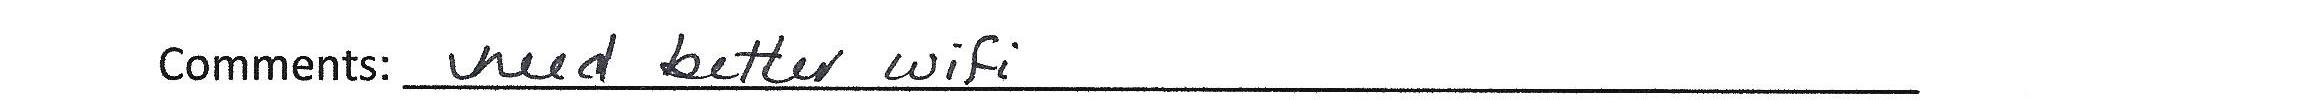

In [44]:
from IPython.display import Image

Image(filename = cropped_sample)


In [45]:
from PIL import Image
import pytesseract
q1_sample = pytesseract.image_to_string(Image.open(cropped_sample))

q1_sample

'Comments: Asced bettey wifi'

#### OCR for Hand Writing
LOL! It got some of the text, but you also have to admit that the handwriting on this completed form is really close to that of typeset text. The trick with OCR for handwriting is to account for the wide range of neatness, style and penmanship of handwriting.We are not going to cover OCR for handwriting that this time. In all honesty, that would a lesson in itself, or possibly two. There are numerous tutorials online if you wish to pursue this topic on your own. 